In [41]:
# Enable interactive rotation of graph
%matplotlib widget

import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

# Load data for activity
X = np.loadtxt('sdata.csv',delimiter=',')

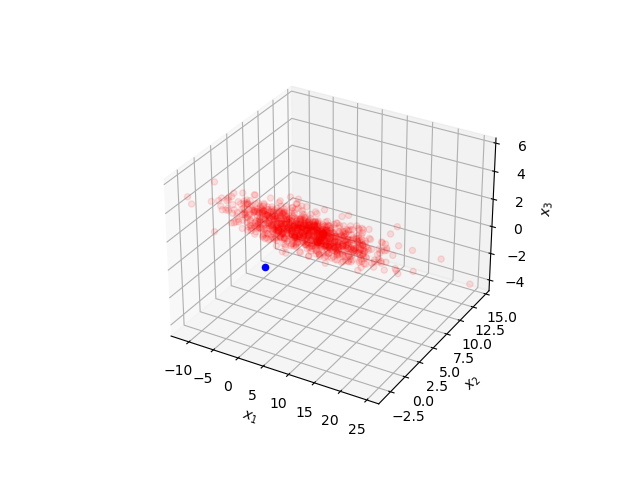

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], X[:,2], c='r', marker='o', alpha=0.1)
ax.scatter(0,0,0,c='b', marker='o')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')

plt.show()
# Use the rotate tool to view the data cloud from different perspectives.


In [43]:
# Subtract mean
X_m = X - np.mean(X, 0)

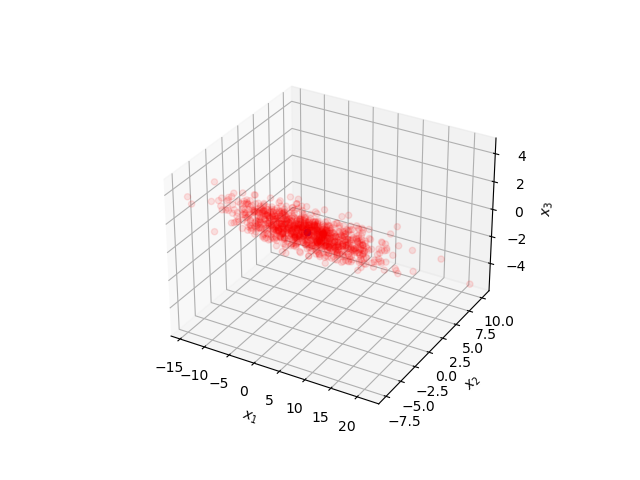

In [45]:
# display zero mean scatter plot
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_m[:,0], X_m[:,1], X_m[:,2], c='r', marker='o', alpha=0.1)

ax.scatter(0,0,0,c='b', marker='o')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')

plt.show()

In [35]:
# Use SVD to find first principal component

U,s,VT = np.linalg.svd(X_m,full_matrices=False)

# complete the next line of code to assign the first principal component to a
a = VT[0]

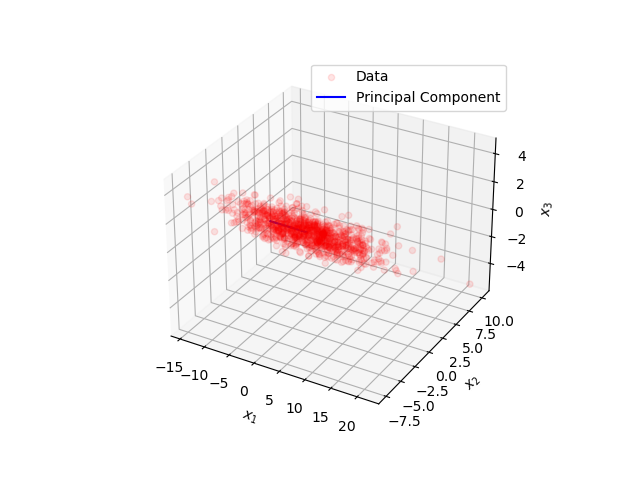

In [36]:
# display zero mean scatter plot and first principal component

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#scale length of line by root mean square of data for display
ss = s[0]/np.sqrt(np.shape(X_m)[0])

ax.scatter(X_m[:,0], X_m[:,1], X_m[:,2], c='r', marker='o', label='Data', alpha=0.1)

ax.plot([0,ss*a[0]],[0,ss*a[1]],[0,ss*a[2]], c='b',label='Principal Component')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')


ax.legend()
plt.show()

In [37]:
# f)
# get mean value of each coordinate
mean = np.mean(X,0)
print(mean)

[3.17585563 4.24319511 1.25610797]


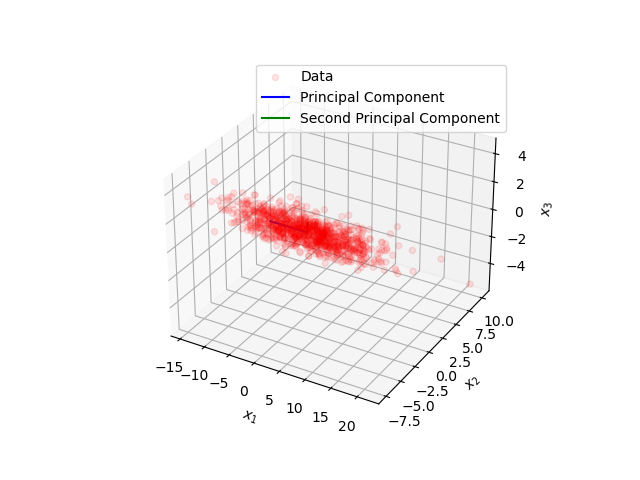

In [38]:
# h)
a2 = VT[1]
# display zero mean scatter plot and second principal component

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#scale length of line by root mean square of data for display
ss2 = s[1]/np.sqrt(np.shape(X_m)[0])

ax.scatter(X_m[:,0], X_m[:,1], X_m[:,2], c='r', marker='o', label='Data', alpha=0.1)

ax.plot([0,ss*a[0]],[0,ss*a[1]],[0,ss*a[2]], c='b',label='Principal Component')
ax.plot([0,ss2*a2[0]],[0,ss2*a2[1]],[0,ss2*a2[2]], c='g',label='Second Principal Component')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')


ax.legend()
plt.show()

In [39]:
x_hat1 = U[:,:1]@np.diag(s)[:1,:1]@VT[:1,:]
print(np.linalg.norm(x_hat1-X_m))
x_hat2 = U[:,:2]@np.diag(s)[:2,:2]@VT[:2,:]
print(np.linalg.norm(x_hat2-X_m))

25.033775591913372
12.367116712429965


## 3

In [52]:
# a)

face_data = loadmat('face_emotion_data.mat')
x = face_data['X']
y = face_data['y']

X = [x[i::8] for i in range(8)]
Y = [y[i::8] for i in range(8)]

totalError = 0
n = 1
for i in range(8):  
    for j in range(8):
        if i == j:
            continue
        xTrain = np.vstack([X[k] for k in range(8) if k != i])
        yTrain = np.vstack([Y[k] for k in range(8) if k != i])
        xTest = X[i]
        yTest = Y[i]
        xVal = X[j]
        yVal = Y[j]
        U,s,VT = np.linalg.svd(xTrain,full_matrices=False)
        sigma_inverse = np.diag(1/s)

        min = 1000000
        rank = 0
        bestW = 0
        for r in range(1, 10):
            wCross = VT.T[:,:r]@sigma_inverse[:r,:r]@U.T[:r,:]@yTrain
            yPred = np.sign(xTest@wCross)
            diff = np.count_nonzero(yTest - yPred)
            if (diff < min):
                min = diff
                rank = r
                bestW = wCross
        yPred = np.sign(xVal@bestW)
        diff = np.count_nonzero(yVal - yPred)
        print("n: ", n, "Error: ", str(diff/16))
        totalError += diff/16
        n += 1
print("Average error: ", str(totalError/64))


n:  1 Error:  0.0625
n:  2 Error:  0.0
n:  3 Error:  0.125
n:  4 Error:  0.0625
n:  5 Error:  0.0625
n:  6 Error:  0.0625
n:  7 Error:  0.125
n:  8 Error:  0.0
n:  9 Error:  0.0625
n:  10 Error:  0.0
n:  11 Error:  0.0
n:  12 Error:  0.0625
n:  13 Error:  0.0625
n:  14 Error:  0.0
n:  15 Error:  0.0
n:  16 Error:  0.0625
n:  17 Error:  0.0
n:  18 Error:  0.0
n:  19 Error:  0.0625
n:  20 Error:  0.0
n:  21 Error:  0.0
n:  22 Error:  0.0
n:  23 Error:  0.0625
n:  24 Error:  0.0625
n:  25 Error:  0.0
n:  26 Error:  0.0
n:  27 Error:  0.0625
n:  28 Error:  0.0
n:  29 Error:  0.0
n:  30 Error:  0.0625
n:  31 Error:  0.0625
n:  32 Error:  0.0
n:  33 Error:  0.0
n:  34 Error:  0.0625
n:  35 Error:  0.0
n:  36 Error:  0.0
n:  37 Error:  0.0625
n:  38 Error:  0.0625
n:  39 Error:  0.0
n:  40 Error:  0.0
n:  41 Error:  0.0625
n:  42 Error:  0.0
n:  43 Error:  0.0
n:  44 Error:  0.0625
n:  45 Error:  0.0625
n:  46 Error:  0.125
n:  47 Error:  0.0625
n:  48 Error:  0.0625
n:  49 Error:  0.0625
n: 

In [53]:
# b)

totalError = 0
n = 1

for i in range(8):
    for j in range(8):
        if i == j:
            continue
        xTrain = np.vstack([X[k] for k in range(8) if k != i])
        yTrain = np.vstack([Y[k] for k in range(8) if k != i])
        xTest = X[i]
        yTest = Y[i]
        xVal = X[j]
        yVal = Y[j]
        U,s,VT = np.linalg.svd(xTrain,full_matrices=False)
        sigma = np.diag(s)

        min = 1000000
        bestLambda = 0
        bestW = 0
        for l in [0, 2**-1, 2**0, 2**1, 2**2, 2**3, 2**4]:
            wCross = VT.T@np.linalg.inv(sigma**2+l*np.identity(9))@sigma@U.T@yTrain
            yPred = np.sign(xTest@wCross)
            diff = np.count_nonzero(yTest - yPred)
            
            if (diff < min):
                min = diff
                bestLambda = l
                bestW = wCross
        yPred = np.sign(xVal@bestW)
        diff = np.count_nonzero(yVal - yPred)
        print("n: ", n, "Error: ", str(diff/16))
        totalError += diff/16
        n += 1
print("Average error: ", str(totalError/64))

n:  1 Error:  0.0625
n:  2 Error:  0.0625
n:  3 Error:  0.0
n:  4 Error:  0.0
n:  5 Error:  0.0
n:  6 Error:  0.0625
n:  7 Error:  0.0
n:  8 Error:  0.0
n:  9 Error:  0.0625
n:  10 Error:  0.0
n:  11 Error:  0.0
n:  12 Error:  0.0
n:  13 Error:  0.0625
n:  14 Error:  0.0
n:  15 Error:  0.0
n:  16 Error:  0.0625
n:  17 Error:  0.0
n:  18 Error:  0.0
n:  19 Error:  0.0
n:  20 Error:  0.0625
n:  21 Error:  0.0
n:  22 Error:  0.0
n:  23 Error:  0.0625
n:  24 Error:  0.0625
n:  25 Error:  0.0
n:  26 Error:  0.0
n:  27 Error:  0.0625
n:  28 Error:  0.0
n:  29 Error:  0.0
n:  30 Error:  0.0625
n:  31 Error:  0.125
n:  32 Error:  0.0
n:  33 Error:  0.0
n:  34 Error:  0.0625
n:  35 Error:  0.0
n:  36 Error:  0.0
n:  37 Error:  0.0625
n:  38 Error:  0.125
n:  39 Error:  0.0
n:  40 Error:  0.0
n:  41 Error:  0.0625
n:  42 Error:  0.0
n:  43 Error:  0.0
n:  44 Error:  0.0625
n:  45 Error:  0.125
n:  46 Error:  0.0
n:  47 Error:  0.0
n:  48 Error:  0.0
n:  49 Error:  0.0
n:  50 Error:  0.0
n:  51 E